In [1]:
import os
import pandas as pd

from surprise import KNNWithMeans
from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise import dump
from surprise.accuracy import rmse

In [2]:
# We will train and test on the u1.base and u1.test files of the movielens-100k dataset.

# Now, let's load the dataset
train_file = os.path.expanduser('~') + '/Downloads/ml-100k/u1.base'
test_file = os.path.expanduser('~') + '/Downloads/ml-100k/u1.test'
data = Dataset.load_from_folds([(train_file, test_file)], Reader('ml-100k'))

                
# We'll use a basic nearest neighbour approach, where similarities are computed
# between users.
algo = KNNWithMeans(k=40, min_k=1, sim_options={'name': 'cosine', 'user_based': True})
for trainset, testset in data.folds(): 
    algo.train(trainset)                             
    predictions = algo.test(testset)
    rmse(predictions)
                                                                               
    dump('./dump_file', predictions, trainset, algo)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9703
The dump has been saved as file ./dump_file


In [3]:
#predictions

In [4]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['err'] = abs(df.est - df.rui)

In [5]:
df.head()

,uid,iid,rui,est,details,err
0,1,6,5.0,3.707803,"{'actual_k': 20, 'was_impossible': False}",1.292197
1,1,10,3.0,3.890720,"{'actual_k': 40, 'was_impossible': False}",0.890720
2,1,12,5.0,4.378248,"{'actual_k': 40, 'was_impossible': False}",0.621752
3,1,14,5.0,4.194055,"{'actual_k': 40, 'was_impossible': False}",0.805945
4,1,17,3.0,3.590459,"{'actual_k': 40, 'was_impossible': False}",0.590459


In [6]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [7]:
# Let's take a look at the best predictions of the algorithm
best_predictions

,uid,iid,rui,est,details,err
8066,181,1393,1.0,1.0,"{'actual_k': 6, 'was_impossible': False}",0.0
5709,118,174,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
5706,118,134,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
5704,118,23,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
5703,118,22,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
4920,96,483,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
4904,96,64,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
4903,96,50,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
5713,118,193,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
4276,90,318,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0


In [8]:
# Now, let's look at the prediction with the biggest error
worst_predictions

,uid,iid,rui,est,details,err
9514,212,180,1.0,4.470945,"{'actual_k': 40, 'was_impossible': False}",3.470945
1087,14,176,1.0,4.476108,"{'actual_k': 40, 'was_impossible': False}",3.476108
10803,239,286,1.0,4.494550,"{'actual_k': 40, 'was_impossible': False}",3.494550
15290,312,157,1.0,4.526946,"{'actual_k': 40, 'was_impossible': False}",3.526946
7861,181,25,5.0,1.375499,"{'actual_k': 40, 'was_impossible': False}",3.624501
7390,167,169,1.0,4.672927,"{'actual_k': 40, 'was_impossible': False}",3.672927
13972,295,183,1.0,4.680678,"{'actual_k': 40, 'was_impossible': False}",3.680678
15306,312,265,1.0,4.730264,"{'actual_k': 40, 'was_impossible': False}",3.730264
15286,312,144,1.0,4.859269,"{'actual_k': 40, 'was_impossible': False}",3.859269
19140,405,575,5.0,1.000000,"{'actual_k': 36, 'was_impossible': False}",4.000000


<IPython.core.display.Javascript object>


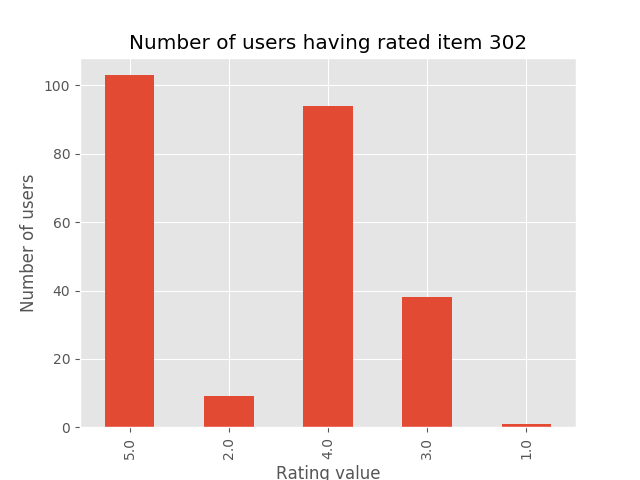

In [9]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item 302')